In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def myImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "이미지 로드 실패"
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

In [3]:
def Harris(img, blockSize=2, apertureSize=3, k=0.04, thresh=0.1):
    radian = 3
    color = (255,0,0)
    thickness = 2
    
    h,w,c = img.shape
    result_img = img.copy()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    corner_response = cv2.cornerHarris(gray_img, blockSize, apertureSize, k)
    
    max_value = np.max(corner_response)
    corner_response /= max_value
    
    for y in range(h):
        for x in range(w):
            if(corner_response[y,x] > thresh):
                cv2.circle(result_img, (x,y), radian, color, 2)
                
    return result_img

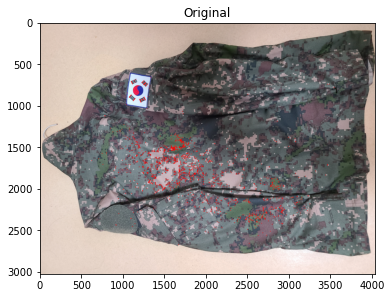

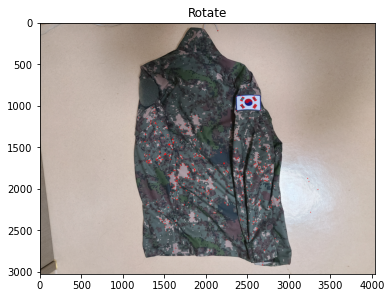

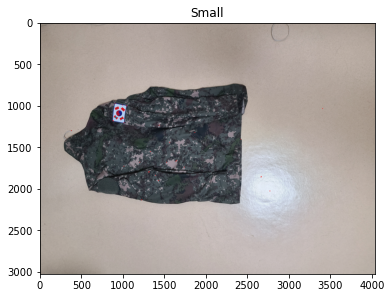

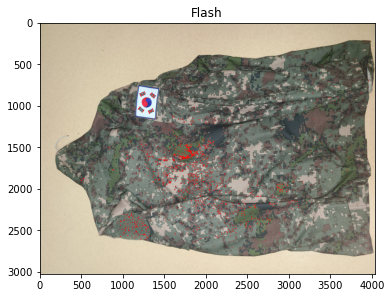

In [6]:
mil1 = myImread("./origin.jpg")
mil2 = myImread("./rotate.jpg")
mil3 = myImread("./small.jpg")
mil4 = myImread("./flash.jpg")

harris1 = Harris(mil1,thresh=0.1)
harris2 = Harris(mil2,thresh=0.1)
harris3 = Harris(mil3,thresh=0.1)
harris4 = Harris(mil4,thresh=0.1)

plt.figure(figsize=(6,6))
plt.title("Original")
plt.imshow(harris1)

plt.figure(figsize=(6,6))
plt.title("Rotate")
plt.imshow(harris2)

plt.figure(figsize=(6,6))
plt.title("Small")
plt.imshow(harris3)

plt.figure(figsize=(6,6))
plt.title("Flash")
plt.imshow(harris4)

In [7]:
def SIFT(img, nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3
    color = (255,0,0)
    thickness = 2
    
    h,w,c = img.shape
    result_img = img.copy()    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #sift = cv2.xfeatures2d.SIFT_create()
    sift= cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)

    if draw_rich:
        cv2.drawKeypoints(result_img, kp, result_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else:
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
                
    return result_img

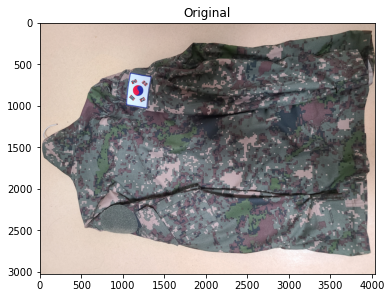

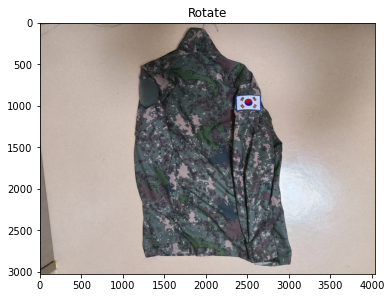

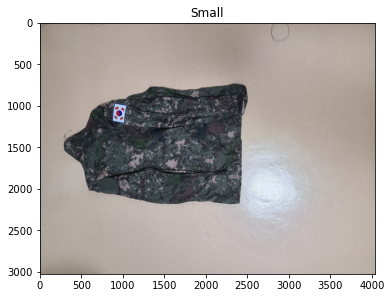

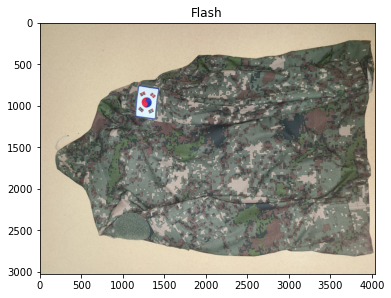

In [9]:
sift1 = SIFT(mil1,nfeatures=50)
sift2 = SIFT(mil2,nfeatures=50)
sift3 = SIFT(mil3,nfeatures=50)
sift4 = SIFT(mil4,nfeatures=50)

plt.figure(figsize=(6,6))
plt.title("Original")
plt.imshow(sift1)

plt.figure(figsize=(6,6))
plt.title("Rotate")
plt.imshow(sift2)

plt.figure(figsize=(6,6))
plt.title("Small")
plt.imshow(sift3)

plt.figure(figsize=(6,6))
plt.title("Flash")
plt.imshow(sift4)